# Structured Data Files

In this section we focus on reading from and writing to files with a row-column format, such as is found in comma-separated (csv) and tab-separated (tsv) data files.

Although `numpy.loadtxt()` is suitable for this task, it is valuable to be able to write your own code solution.

## Writing a Data File

Let us generate some data and write it in a csv format (comma-separated values). In general what you use as the separator (delimiter) for your data is up to you, but if we use a .csv file extension it's best to stick to the standard.

In [1]:
import numpy as np

#Generating data
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
z = np.cos(x)

#Writing the data to file in csv format
with open('data1.csv', 'w') as f:
    f.write('x,sin(x),cos(x)\n') #Header
    
    for xx, yy, zz in zip(x, y, z):
        f.write(f'{xx},{yy},{zz}\n')

If you are not familiar with the string formatting used (`f'{xx},{yy},{zz}\n'`) see the page [**The Python Standard Library/Strings/String Formatting**](../strings/string-formatting). Note that it is in this line (and also in the header) that we have separated the values with commas.

Note that the file extension **.csv** acts more as a hint for other software. There is no physical difference between a file we write with this extension or any other extension (including no extension). As long as the file mode is set to text (`'t'`), we are writing plain text files.

The output of our data file **data1.csv** looks like:

In [2]:
with open('data1.csv', 'r') as f:
    data1 = f.readlines()

print(('{}'*10).format(*data1[:10]))

x,sin(x),cos(x)
0.0,0.0,1.0
0.1282282715750936,0.127877161684506,0.9917900138232462
0.2564565431501872,0.25365458390950735,0.9672948630390295
0.38468481472528077,0.3752670048793741,0.9269167573460217
0.5129130863003744,0.49071755200393785,0.8713187041233894
0.6411413578754679,0.5981105304912159,0.8014136218679567
0.7693696294505615,0.6956825506034864,0.7183493500977276
0.8975979010256552,0.7818314824680298,0.6234898018587336
1.0258261726007487,0.8551427630053461,0.5183925683105252



Or in a more presentable format:

In [3]:
import pandas as pd
from IPython.display import display, HTML

data1 = pd.read_csv('data1.csv')

display(HTML(data1.to_html(max_rows = 8, index = False)))

x,sin(x),cos(x)
0.000000,0.000000e+00,1.000000
0.128228,1.278772e-01,0.991790
0.256457,2.536546e-01,0.967295
0.384685,3.752670e-01,0.926917
...,...,...
5.898500,-3.752670e-01,0.926917
6.026729,-2.536546e-01,0.967295
6.154957,-1.278772e-01,0.991790
6.283185,-2.449294e-16,1.000000


## Reading a Data File

Now, let's read the data file we wrote. If we want to store each column in a separate list or array, it will be best to iterate through the lines of the file.

We will need to divide the values from each line using the separator. To do this, we will use the `.split()` string method:

In [4]:
'a b c d'.split()

['a', 'b', 'c', 'd']

As you can see this splits the string into a list of strings. By default it uses a space as the dividing character, given a string argument it will use that as the delimiter instead:

In [5]:
'a,b,c,d'.split(',')

['a', 'b', 'c', 'd']

We must keep in mind that the file we are reading has a header we want to read before any of the data.

Something else to keep in mind is that the file contains text (or rather the content is a string). If we want to store the data as numbers, we need to convert them first.

In [6]:
#Lists to hold the data
x = []
y = []
z = []

with open('data1.csv', 'r') as f:
    header = f.readline() #read header
    
    for line in f:
        line = line.strip() #This clears trailing whitespace (e.g. \n)
        
        #Makes a list from the string using ',' as the seperator
        line = line.split(',')
        
        x.append(float(line[0]))
        y.append(float(line[1]))
        z.append(float(line[2]))

#If you need to convert x, y, z to arrays:
x = np.array(x)
y = np.array(y)
z = np.array(z)

Note that we start with lists and convert to an array later (if an array is needed). The reason for doing this is that we don't necessarily know how many lines the file has before we begin, and appending to lists is more easy and efficient than concatenating arrays.

As a sanity check, let's plot the data we have just read:

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(x, y, label = 'sin(x)')
ax.plot(x, z, '--',  label = 'cos(x)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc = 9)

plt.show()

<Figure size 640x480 with 1 Axes>

## Writing and Reading a Tab Separated File

If you are comfortable with the sections above, you may skip this one. If you'd like to see another example of a data file with a different delimiter, we will write a data file using tab separation instead of commas (tsv).

In [8]:
import numpy as np

#Generating data
x = np.linspace(0, 2, 100)
y = np.sqrt(x)
z = x*x

#Writing a data file with space seperations
with open('data2.tsv', 'w') as f:
    f.write('x\ty\tz\n') #Header
    
    for xx, yy, zz in zip(x, y, z):
        f.write(f'{xx}\t{yy}\t{zz}\n')

Here we use the special character `'\t'` which stands for tabs.

Again, the use of the **.tsv** file extension is a convention, it does not alter the nature of the file itself.

The contents of the data file we have generated looks like this:

In [9]:
with open('data2.tsv', 'r') as f:
    data2 = f.readlines()

print(('{}'*10).format(*data2[:10]))

x	y	z
0.0	0.0	0.0
0.020202020202020204	0.1421338109037403	0.0004081216202428324
0.04040404040404041	0.20100756305184242	0.0016324864809713297
0.06060606060606061	0.24618298195866548	0.0036730945821854917
0.08080808080808081	0.2842676218074806	0.006529945923885319
0.10101010101010102	0.31782086308186414	0.010203040506070812
0.12121212121212122	0.3481553119113957	0.014692378328741967
0.14141414141414144	0.3760507165451775	0.019997959391898794
0.16161616161616163	0.40201512610368484	0.026119783695541274



Now, let's read the data keeping in mind that the values are now separated with tabs.

In [10]:
#Lists to hold the data
x = []
y = []
z = []

with open('data2.tsv', 'r') as f:
    header = f.readline() #read header
    
    for line in f:
        line = line.strip() #This clears trailing whitespace (e.g. \n)
        
        #Makes a list from the string using '\t' as the seperator
        line = line.split('\t')
        
        x.append(float(line[0]))
        y.append(float(line[1]))
        z.append(float(line[2]))

#If you need to convert x, y, z to arrays:
x = np.array(x)
y = np.array(y)
z = np.array(z)

Plotting this data:

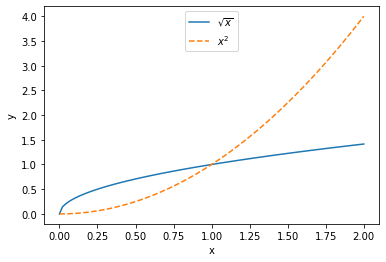

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(x, y, label = r'$\sqrt{x}$')
ax.plot(x, z, '--',  label = r'$x^2$')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc = 9)

plt.show()

## Reading Data in as a Single Array

Sometimes you want to read the data in as a single 2D array (for example if you have a large data file or if the number of columns in your data file aren't fixed). Let's read the file **data2.tsv** in this manner:

In [12]:
#Lists to hold the data
data = []

with open('data2.tsv', 'r') as f:
    header = f.readline() #read header
    
    for line in f:
        line = line.strip() #This clears trailing whitespace (e.g. \n)
        line = line.split('\t') #Makes a list
        
        #Converting data to floats
        for i,col in enumerate(line):
            line[i] = np.float(col)
        
        data.append(line)

#Converting data to array
data = np.array(data)

Note that this gives us a similar output to NumPy's `numpy.loadtxt()`. Plotting the data (use slices to extract the columns):

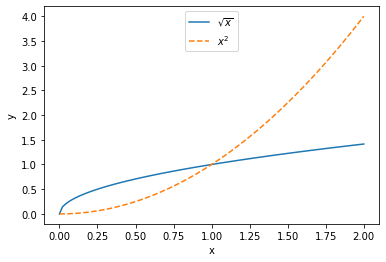

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(data[:,0], data[:,1], label = r'$\sqrt{x}$')
ax.plot(data[:,0], data[:,2], '--',  label = r'$x^2$')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc = 9)

plt.show()